In [231]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

In [237]:
df.wa.fa <- read_excel("../../results/df-four-scores.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df <- df.wa.fa[,c(2:5)]
head(df,7)
df <- df %>% 
  rename(
     Spring_Dist = V1,
     Well = V2,
     Piped_Yard_Tap= V3,
     Piped_Home= V4   
    )

head(df,7)

V1,V2,V3,V4
<dbl>,<dbl>,<dbl>,<dbl>
0.33010263,0.60110288,0.4301594,0.6498170
0.20236862,0.27773577,0.3322685,0.5996713
0.37451327,0.65190041,0.4579437,0.7650363
0.00000000,0.03179103,0.3635339,0.8450433
0.17116495,0.23385010,0.4104451,0.6323822
0.05283778,0.10000389,0.3018868,0.0000000
0.22614760,0.60888154,0.4949832,0.5560220


Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
<dbl>,<dbl>,<dbl>,<dbl>
0.33010263,0.60110288,0.4301594,0.6498170
0.20236862,0.27773577,0.3322685,0.5996713
0.37451327,0.65190041,0.4579437,0.7650363
0.00000000,0.03179103,0.3635339,0.8450433
0.17116495,0.23385010,0.4104451,0.6323822
0.05283778,0.10000389,0.3018868,0.0000000
0.22614760,0.60888154,0.4949832,0.5560220


  Spring_Dist          Well        Piped_Yard_Tap     Piped_Home    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1410   1st Qu.:0.1408   1st Qu.:0.3376   1st Qu.:0.5560  
 Median :0.2261   Median :0.3356   Median :0.4831   Median :0.7010  
 Mean   :0.2664   Mean   :0.3668   Mean   :0.4533   Mean   :0.6611  
 3rd Qu.:0.3255   3rd Qu.:0.5795   3rd Qu.:0.5564   3rd Qu.:0.7910  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
<dbl>,<dbl>,<dbl>,<dbl>
0.33010263,0.60110288,0.4301594,0.6498170
0.20236862,0.27773577,0.3322685,0.5996713
0.37451327,0.65190041,0.4579437,0.7650363
0.00000000,0.03179103,0.3635339,0.8450433
0.17116495,0.23385010,0.4104451,0.6323822
0.05283778,0.10000389,0.3018868,0.0000000


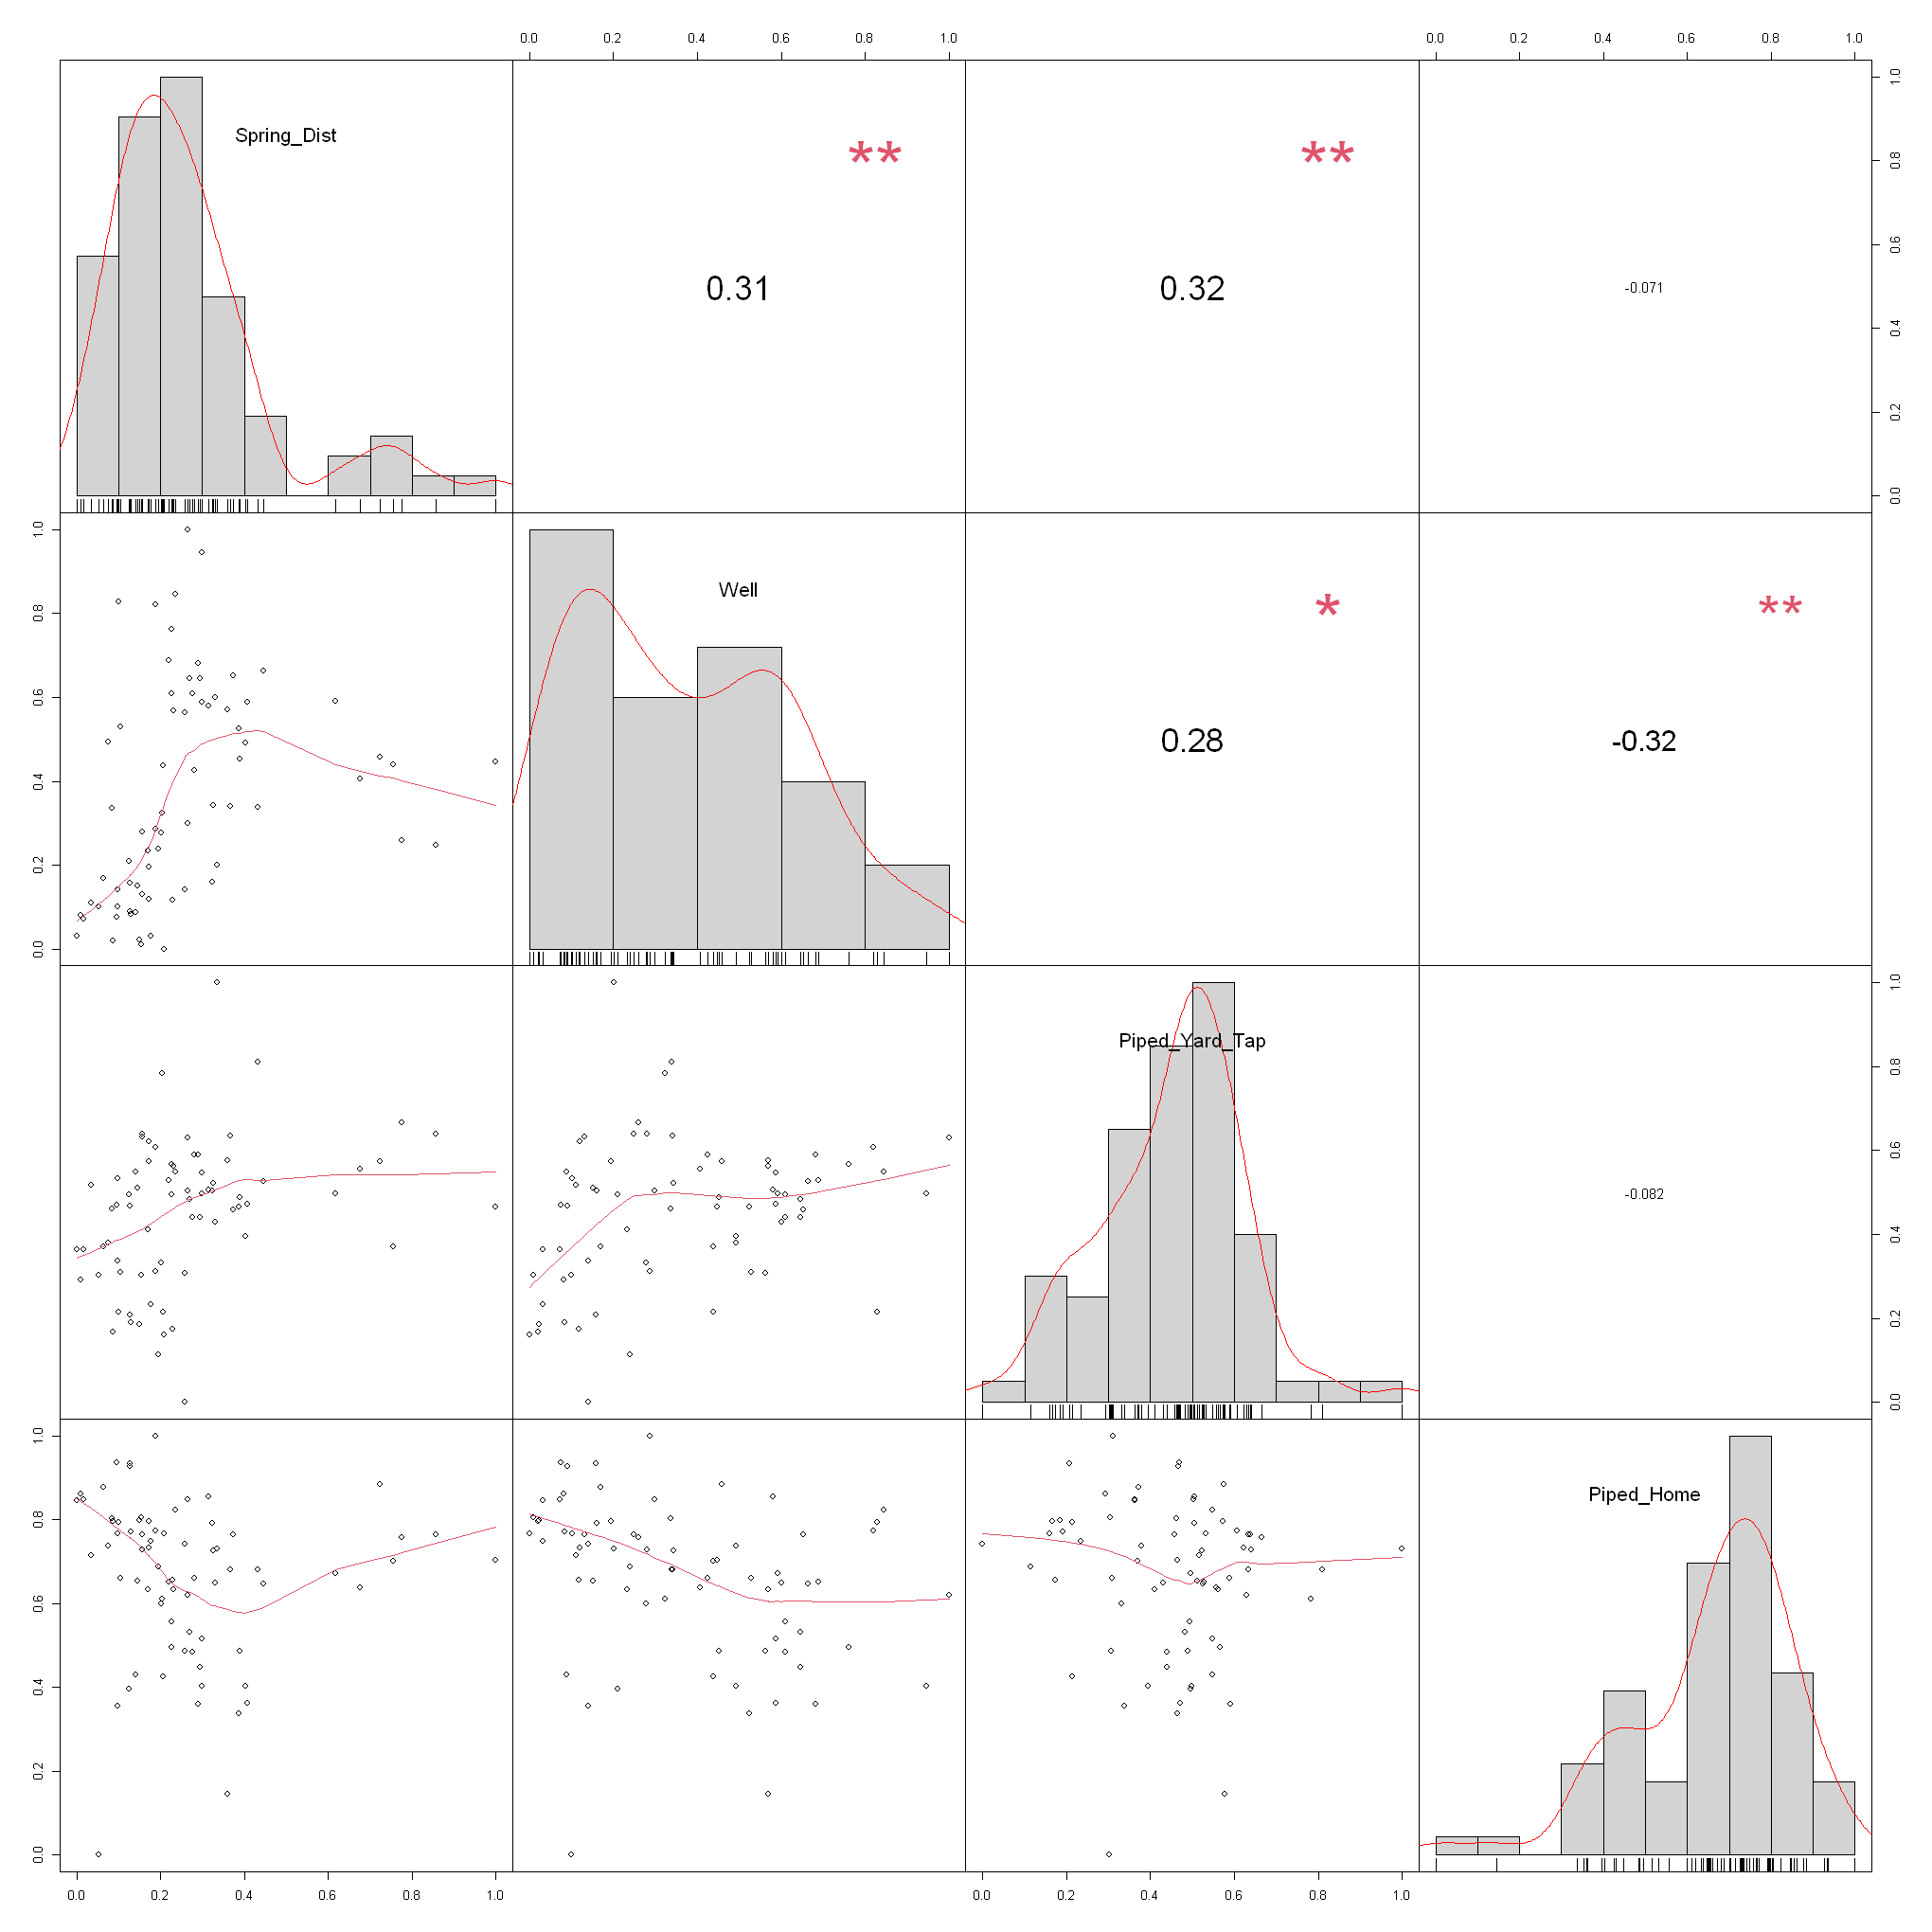

In [238]:
summary(df)
head(df)
chart.Correlation(df, histogram=TRUE, pch=19 , tl.cex = .7 )

In [239]:
# Create data: Water Accessibility Aggregate
dfsimple$clusters
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.avg <- df.wa.aggregate[,1:5]
df.wa.avg

[1] 1 2 1 3 2 2 1 2 1 4 1 1 1 3 2 2 4 1 3 3 1 2 4 2 2 2 3 1 3 4 3 2 3 3 2 2 2 1
[39] 4 1 3 1 1 1 2 1 1 2 2 3 1 1 2 4 3 3 4 2 2 1 2 2 1 2 1 3 3 1 2 3 3 1 1

clusters,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2918055,0.6545405,0.4796259,0.5461058
2,0.1886534,0.2470074,0.5397961,0.6454671
3,0.1305089,0.0959286,0.2573535,0.8232715
4,0.7720080,0.4075656,0.5381927,0.7311460


In [144]:
# Dark2 code: ## [1] "#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A" ,"#66A61E" ,"#E6AB02" ,"#A6761D"
## [8] "#666666"

[1] 1.428932 2.191942 3.125739 4.193606

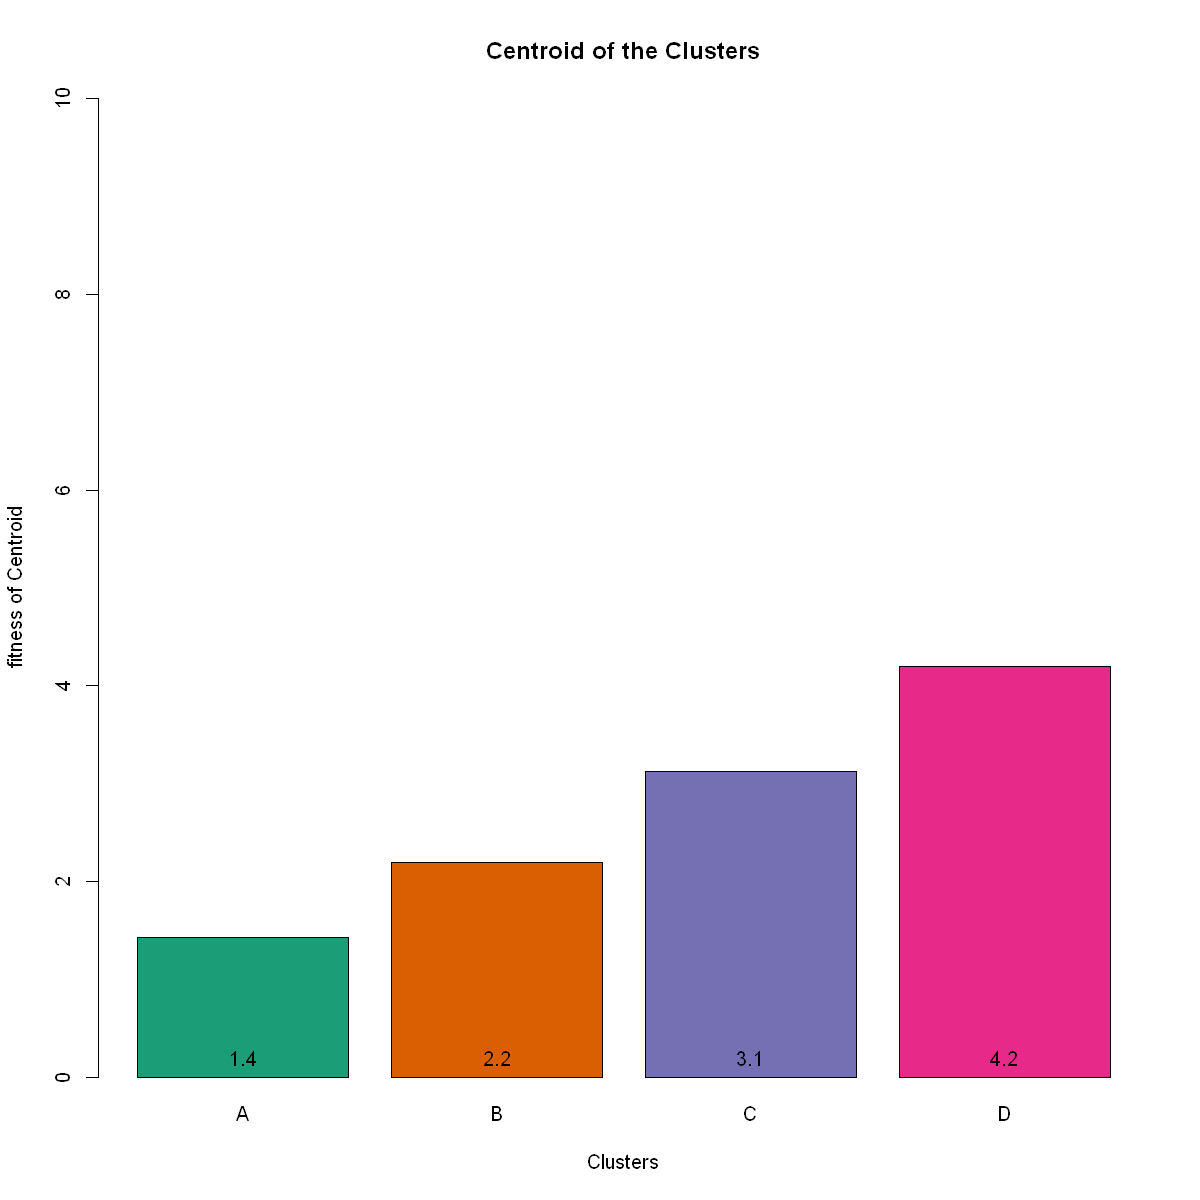

[1] 1.0380711 0.7668756 1.1662878 0.9204704 0.8076854 0.3223791

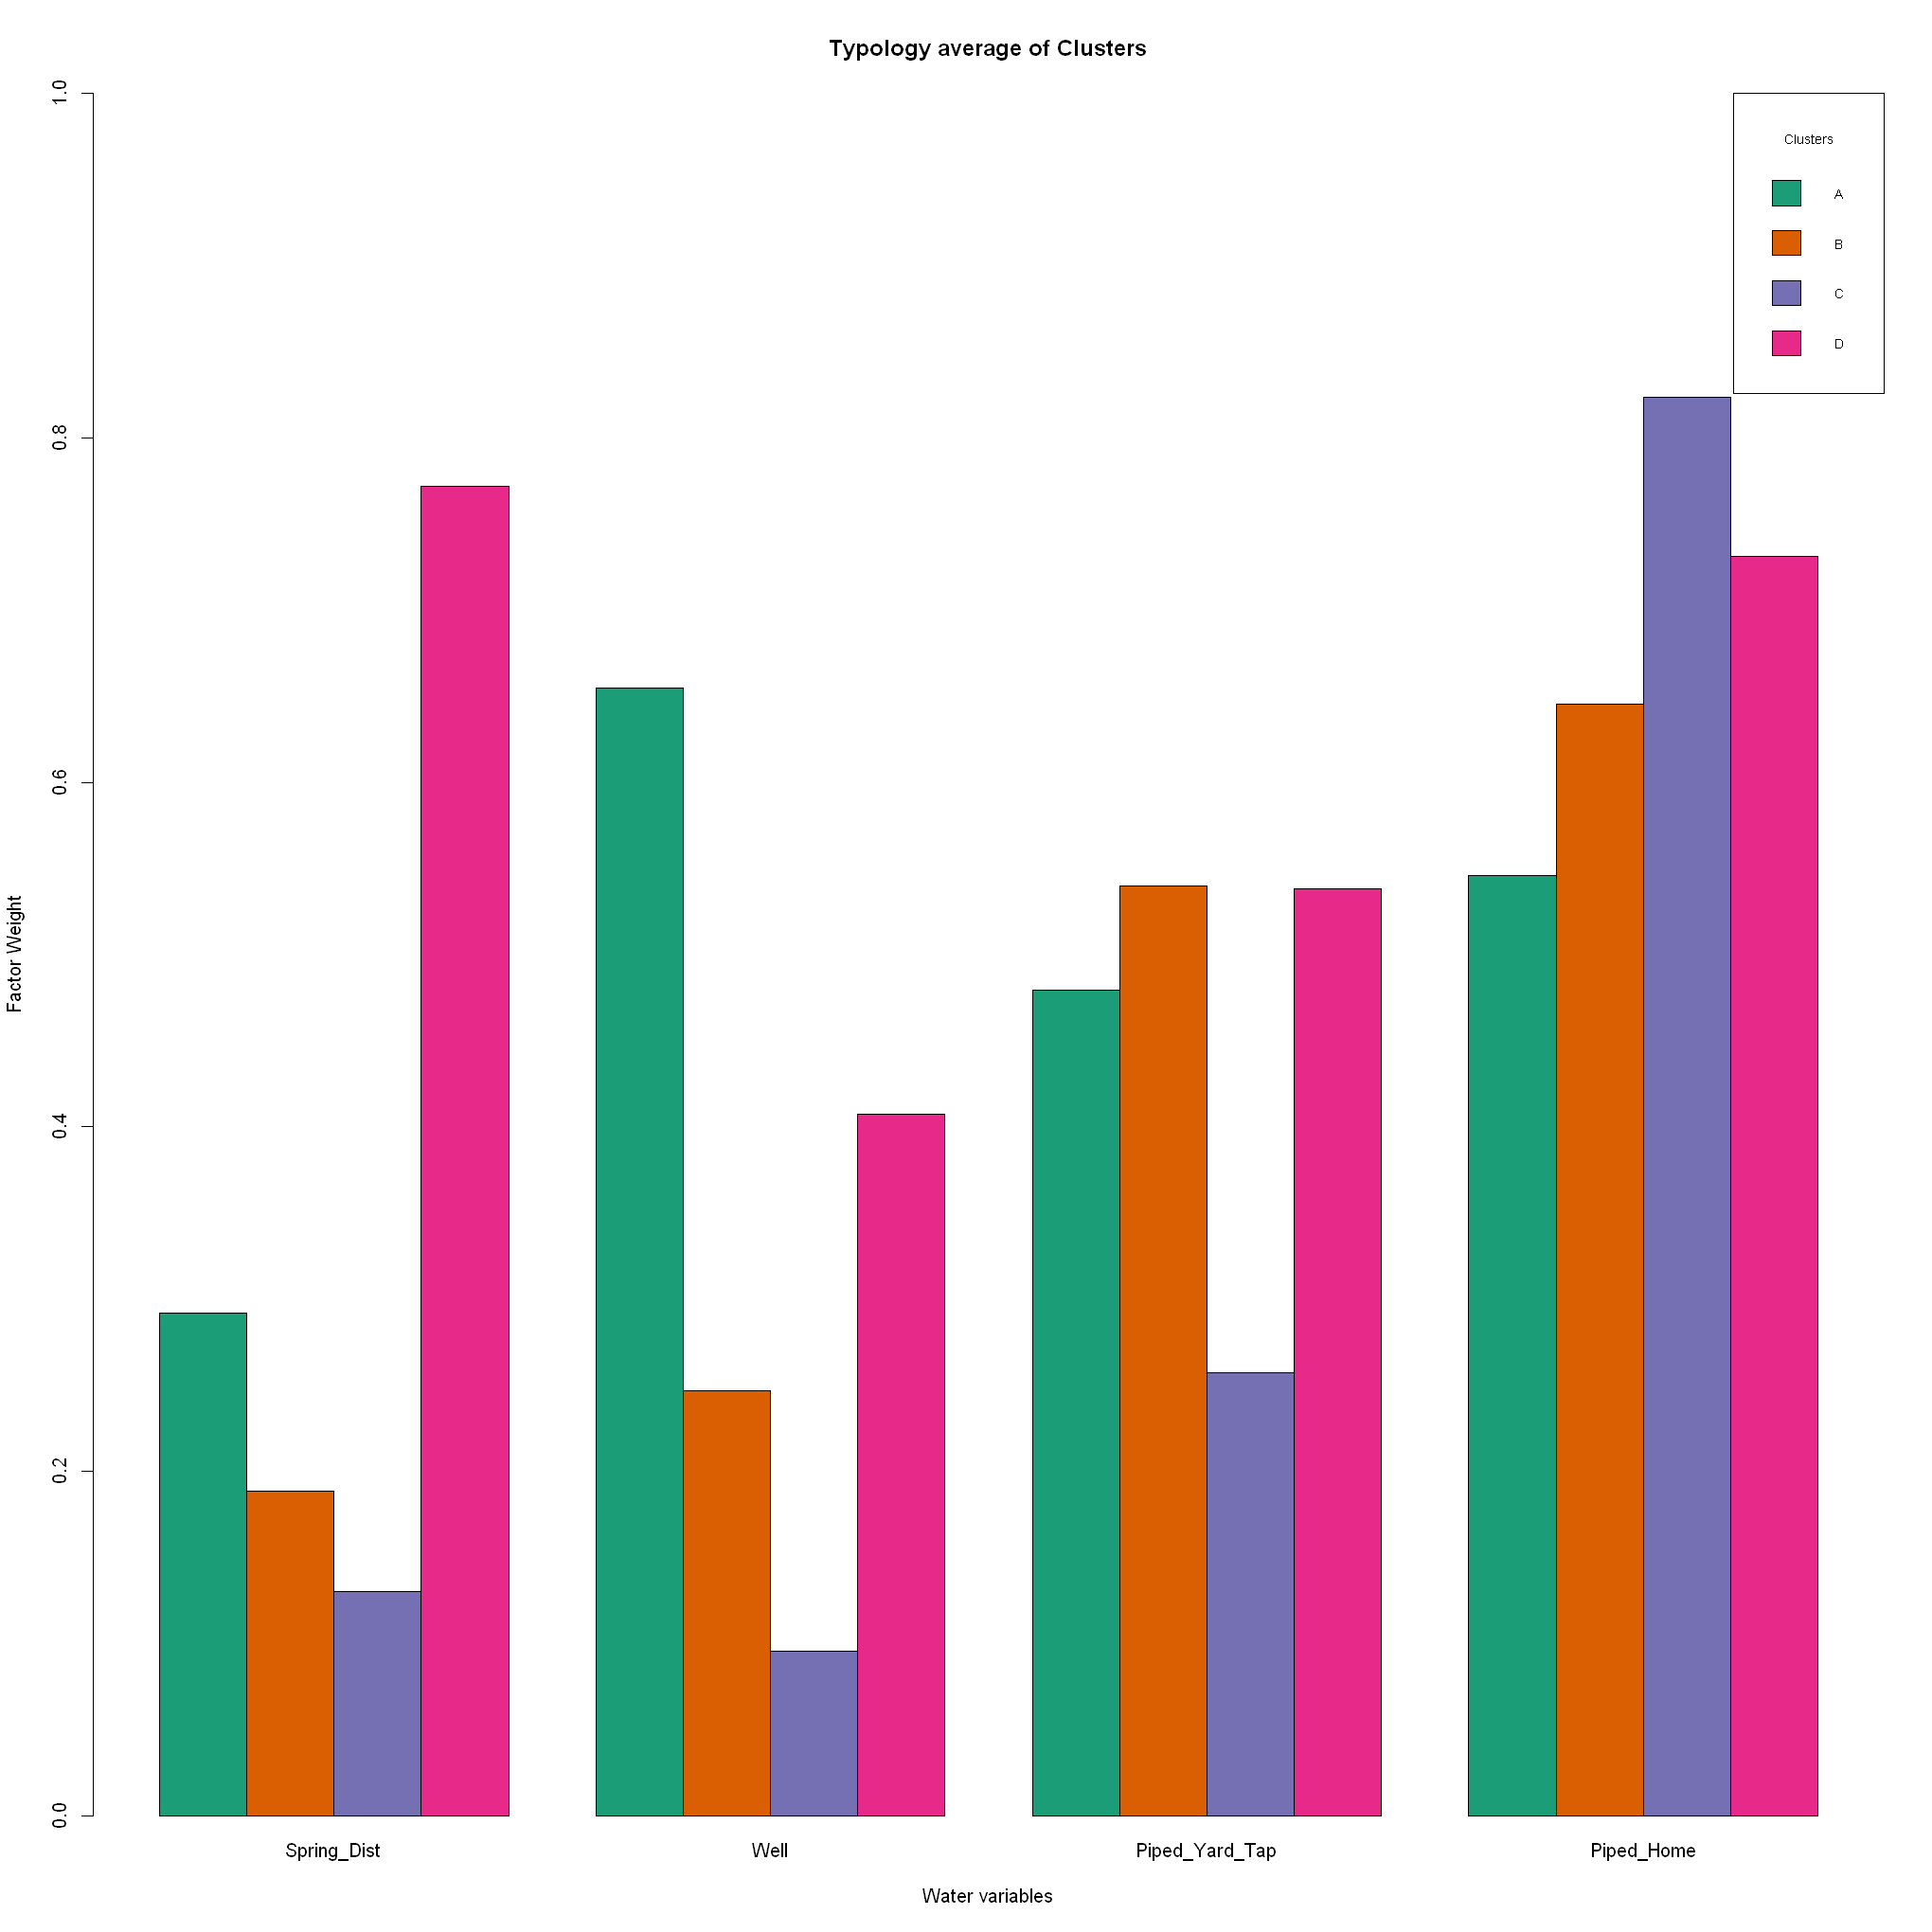

In [243]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
                  
options(repr.plot.width=10, repr.plot.height=10)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A"),
        ylim = c(0, 10), names.arg = c("A", "B", "C","D"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(abs(df.wa.avg[,c(2:5)])),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Factor Weight",
        col = c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A"),
        legend = c("A", "B", "C","D"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 1))
                  


centroiddf.wa <- apply(df, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,1.0000000,1.0000000,1.0000000
2,0.0000000,0.0000000,0.0000000,0.0000000
3,0.2918055,0.6545405,0.4796259,0.5461058
4,0.1886534,0.2470074,0.5397961,0.6454671
5,0.1305089,0.0959286,0.2573535,0.8232715
6,0.7720080,0.4075656,0.5381927,0.7311460


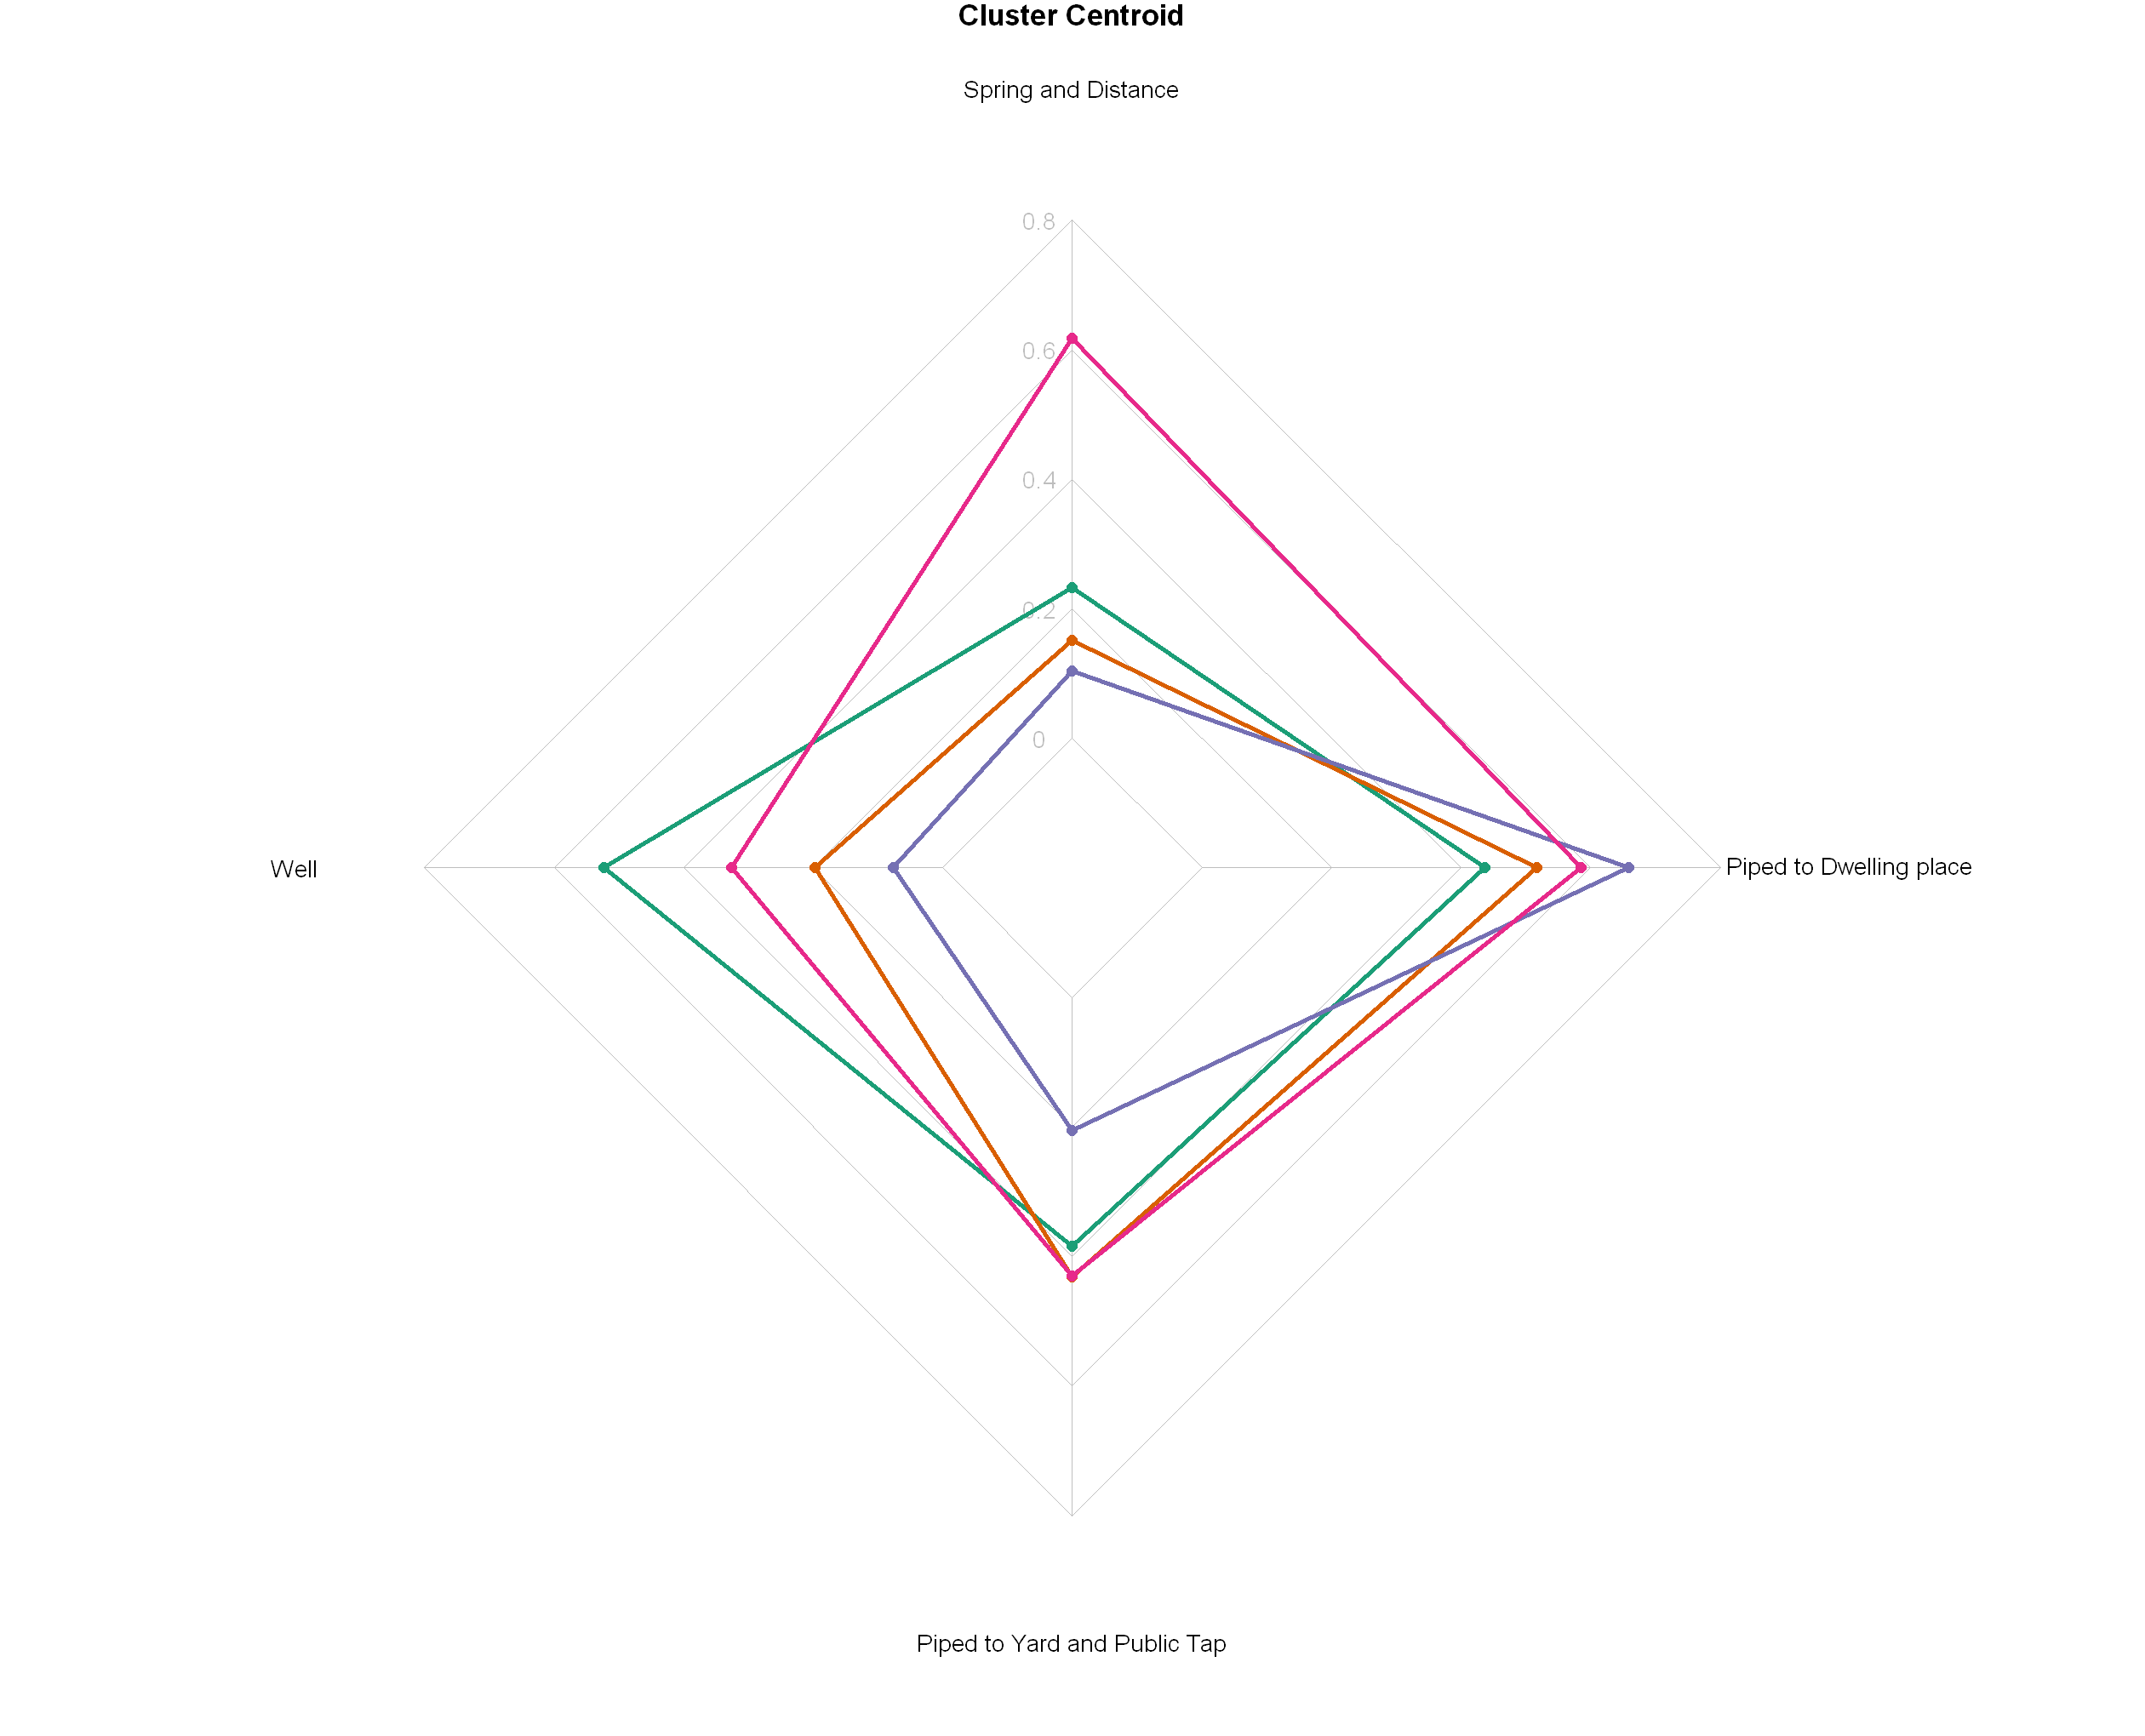

In [245]:
data.spider <- rbind(rep(1,1) , rep(0,1) , df.wa.avg[,c(2:5)])

head(data.spider,7)
colnames(data.spider) <- c(                 
    "Spring and Distance",
"Well",
"Piped to Yard and Public Tap",
"Piped to Dwelling place")                       
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1.4)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,1,.2), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
<dbl>,<dbl>,<dbl>,<dbl>
0.2918055,0.6545405,0.4796259,0.5461058
0.1886534,0.2470074,0.5397961,0.6454671
0.1305089,0.0959286,0.2573535,0.8232715
0.7720080,0.4075656,0.5381927,0.7311460


[1] "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


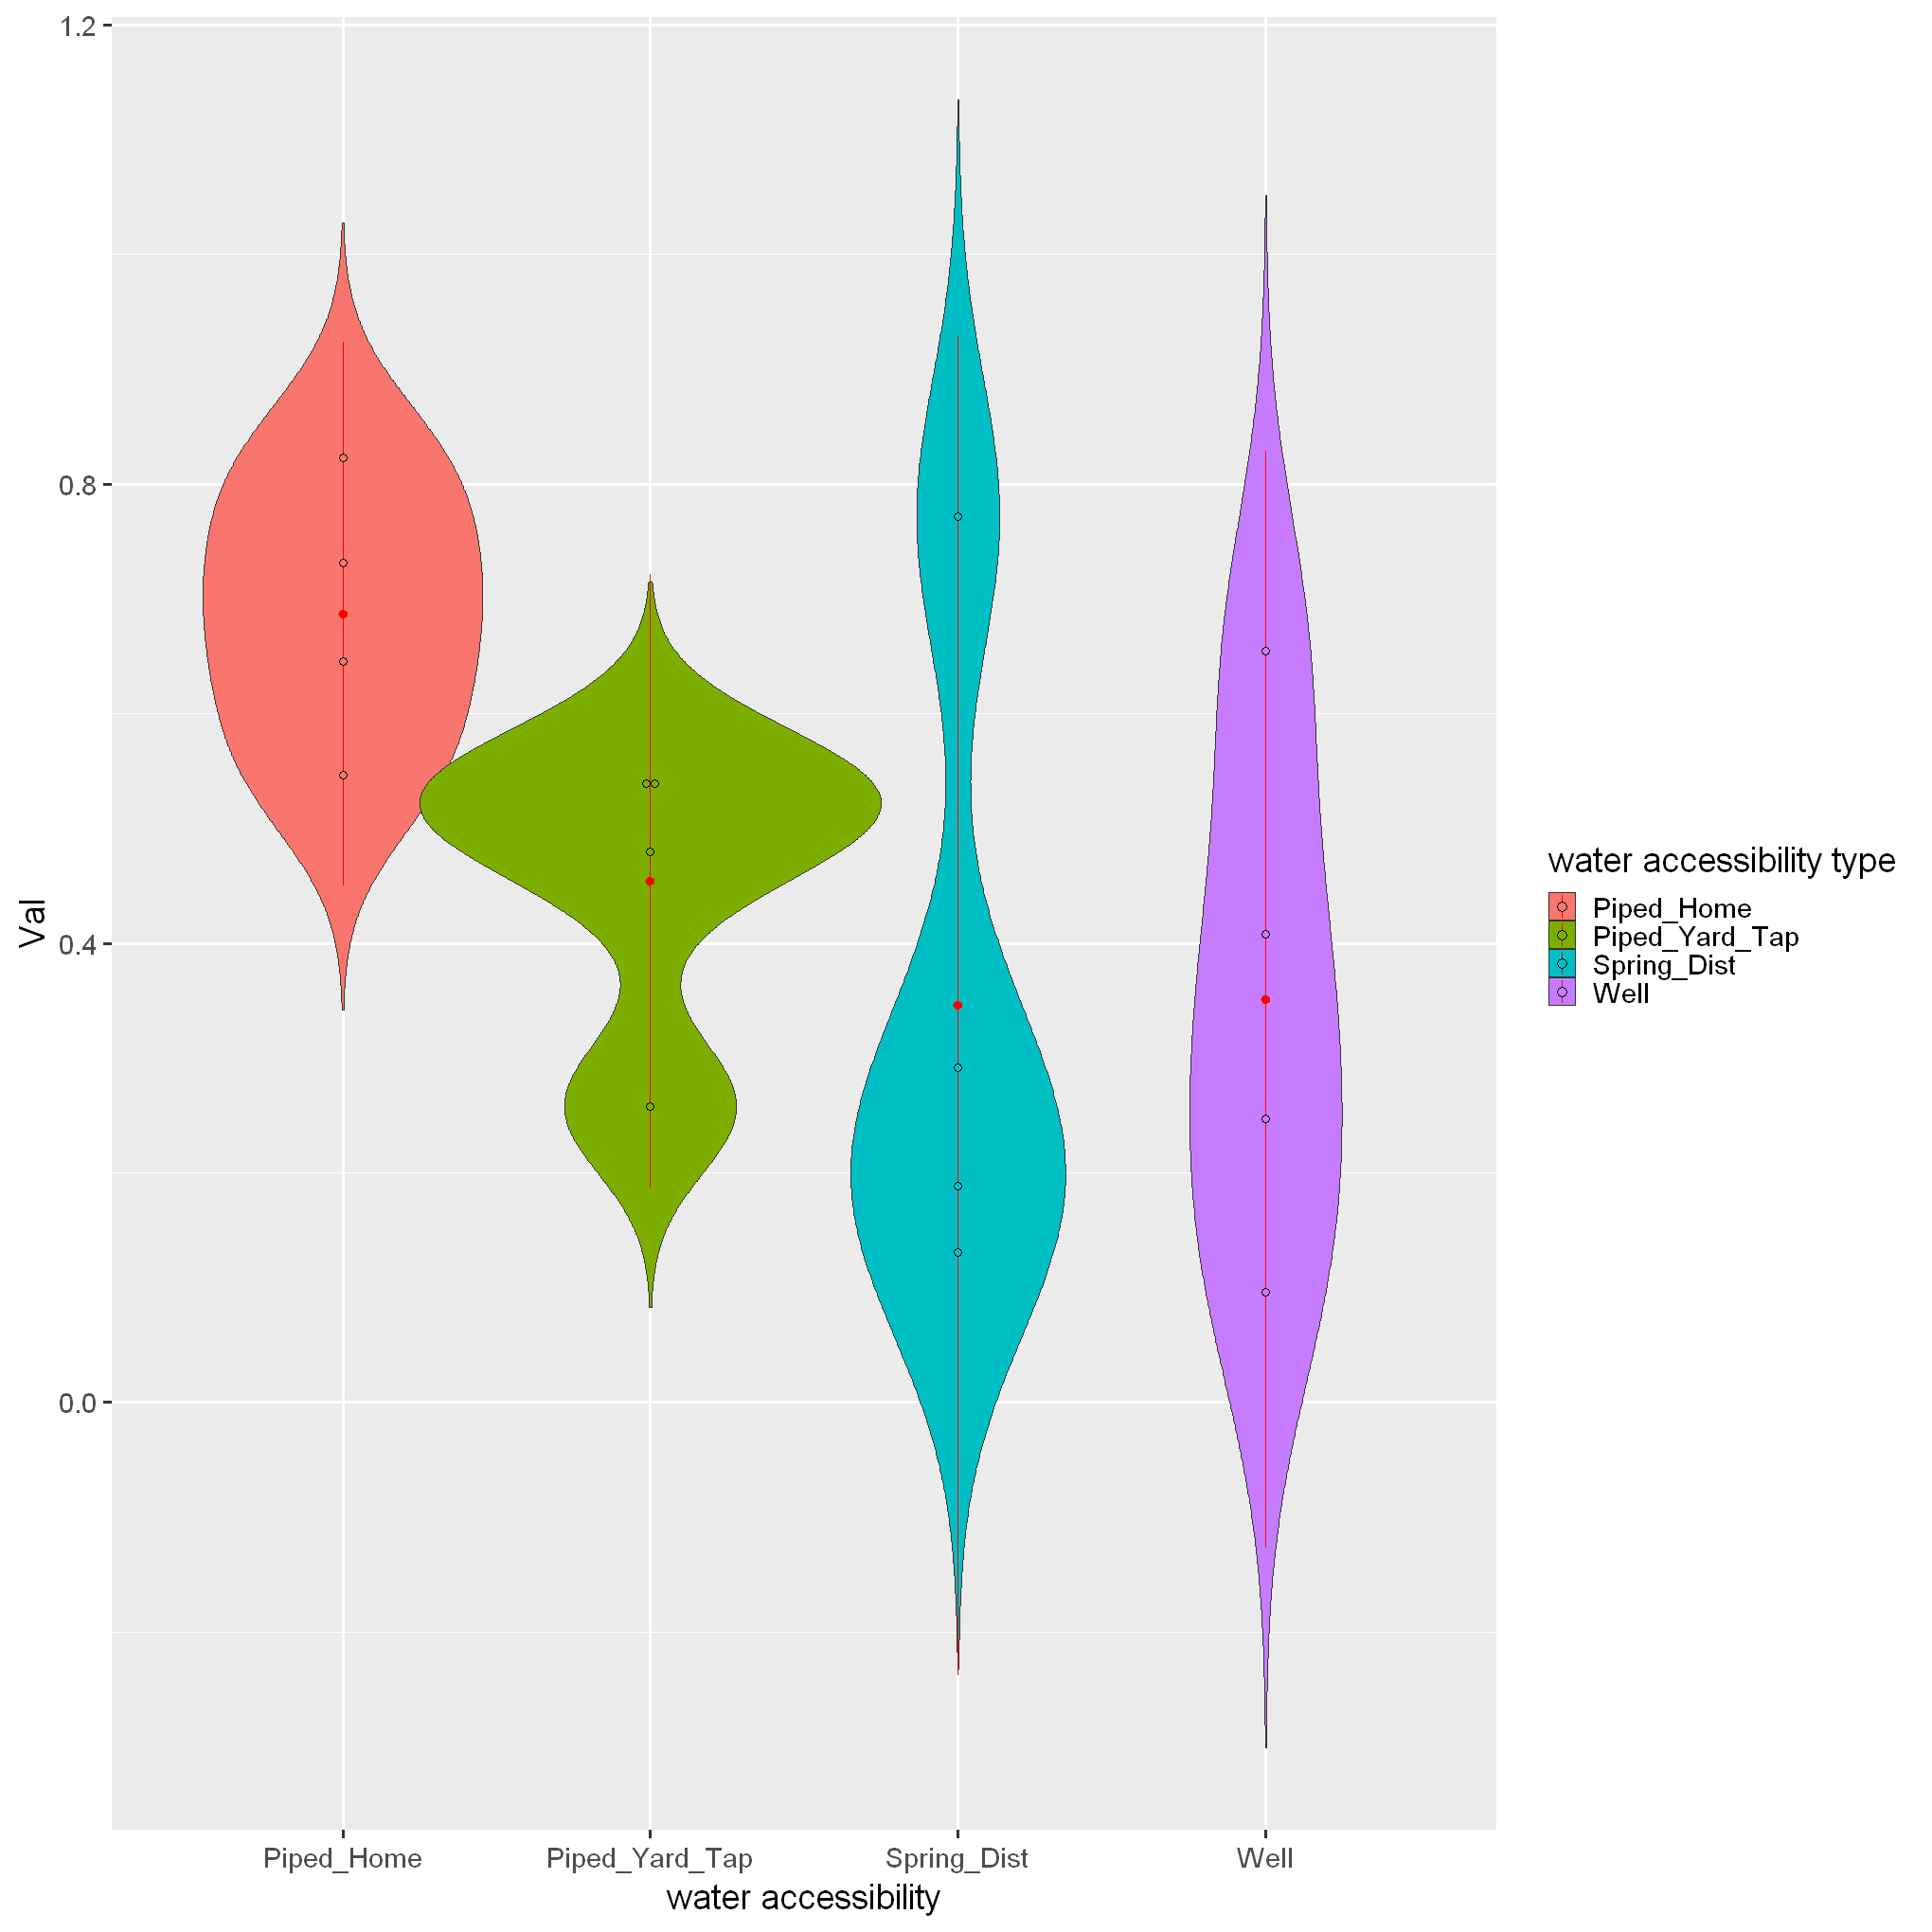

In [246]:
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:5]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa_one <- df.wa.aggregate[  ,1:4]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Facet Graphs 


 1  2  3  4 
25 24 17  7 

clusters,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2918055,0.6545405,0.4796259,0.5461058
2,0.1886534,0.2470074,0.5397961,0.6454671
3,0.1305089,0.0959286,0.2573535,0.8232715
4,0.7720080,0.4075656,0.5381927,0.7311460


clusters    Spring_Dist           Well Piped_Yard_Tap     Piped_Home 
      "factor"      "numeric"      "numeric"      "numeric"      "numeric"

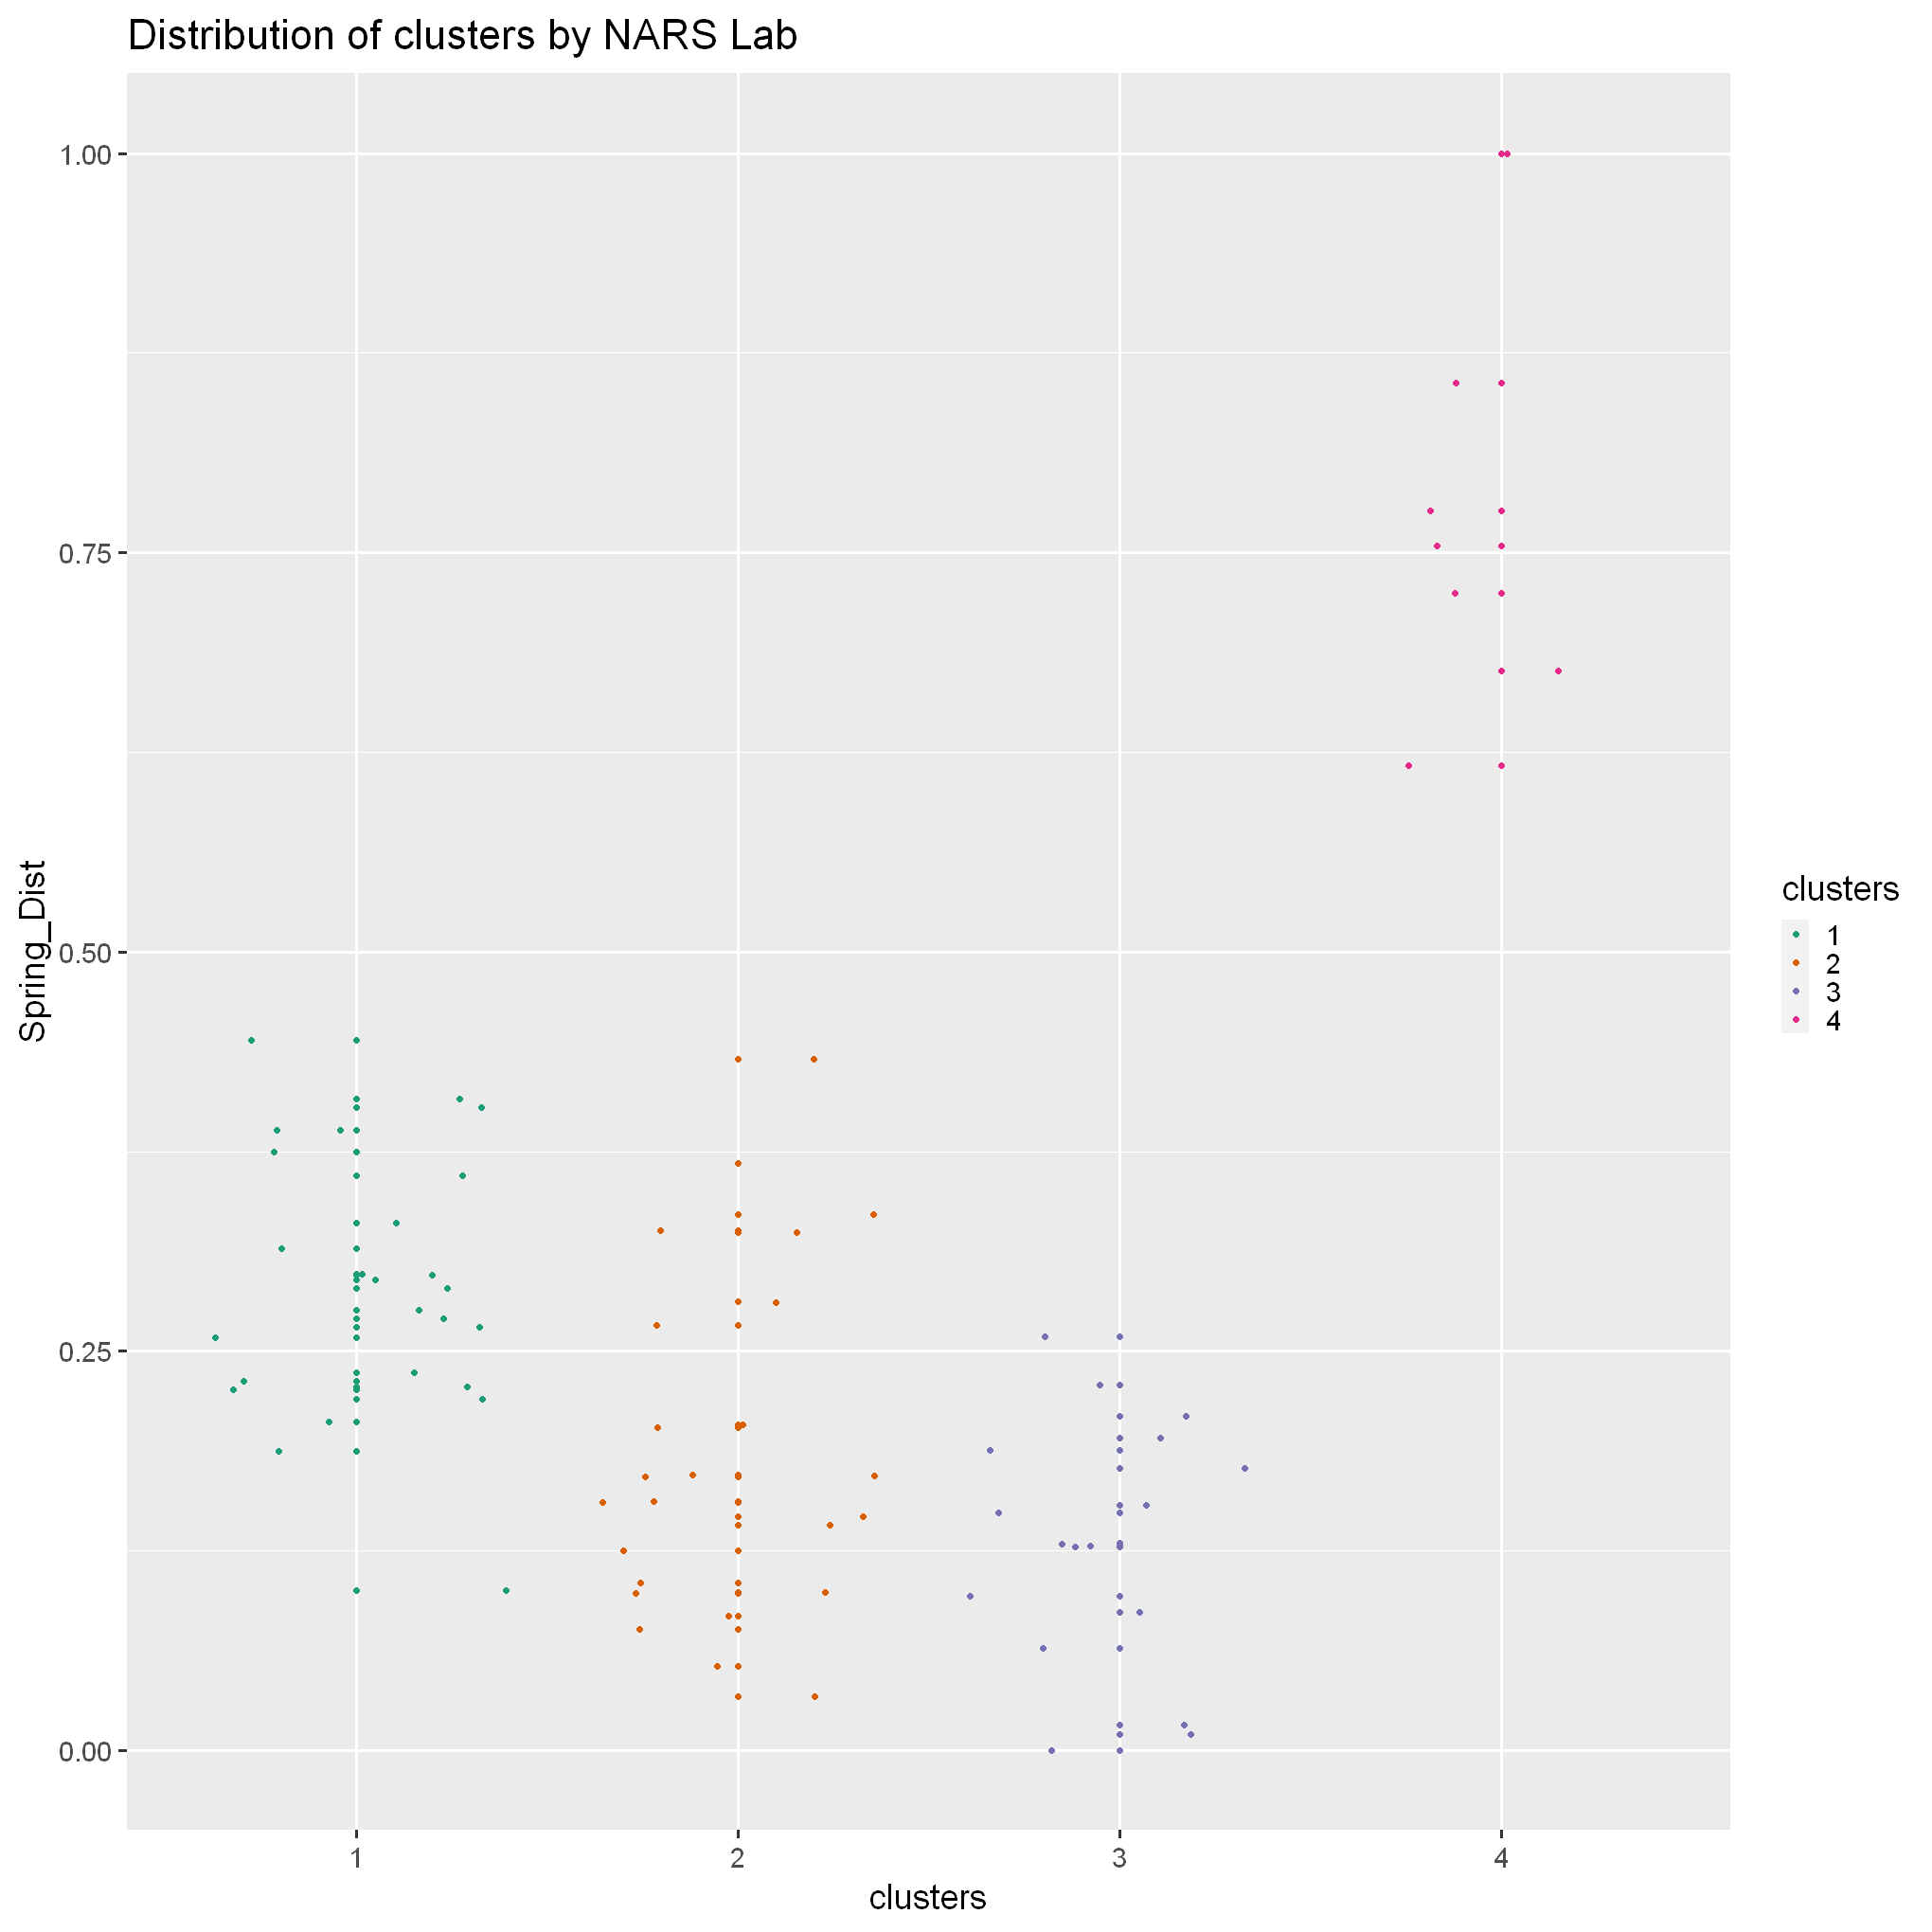

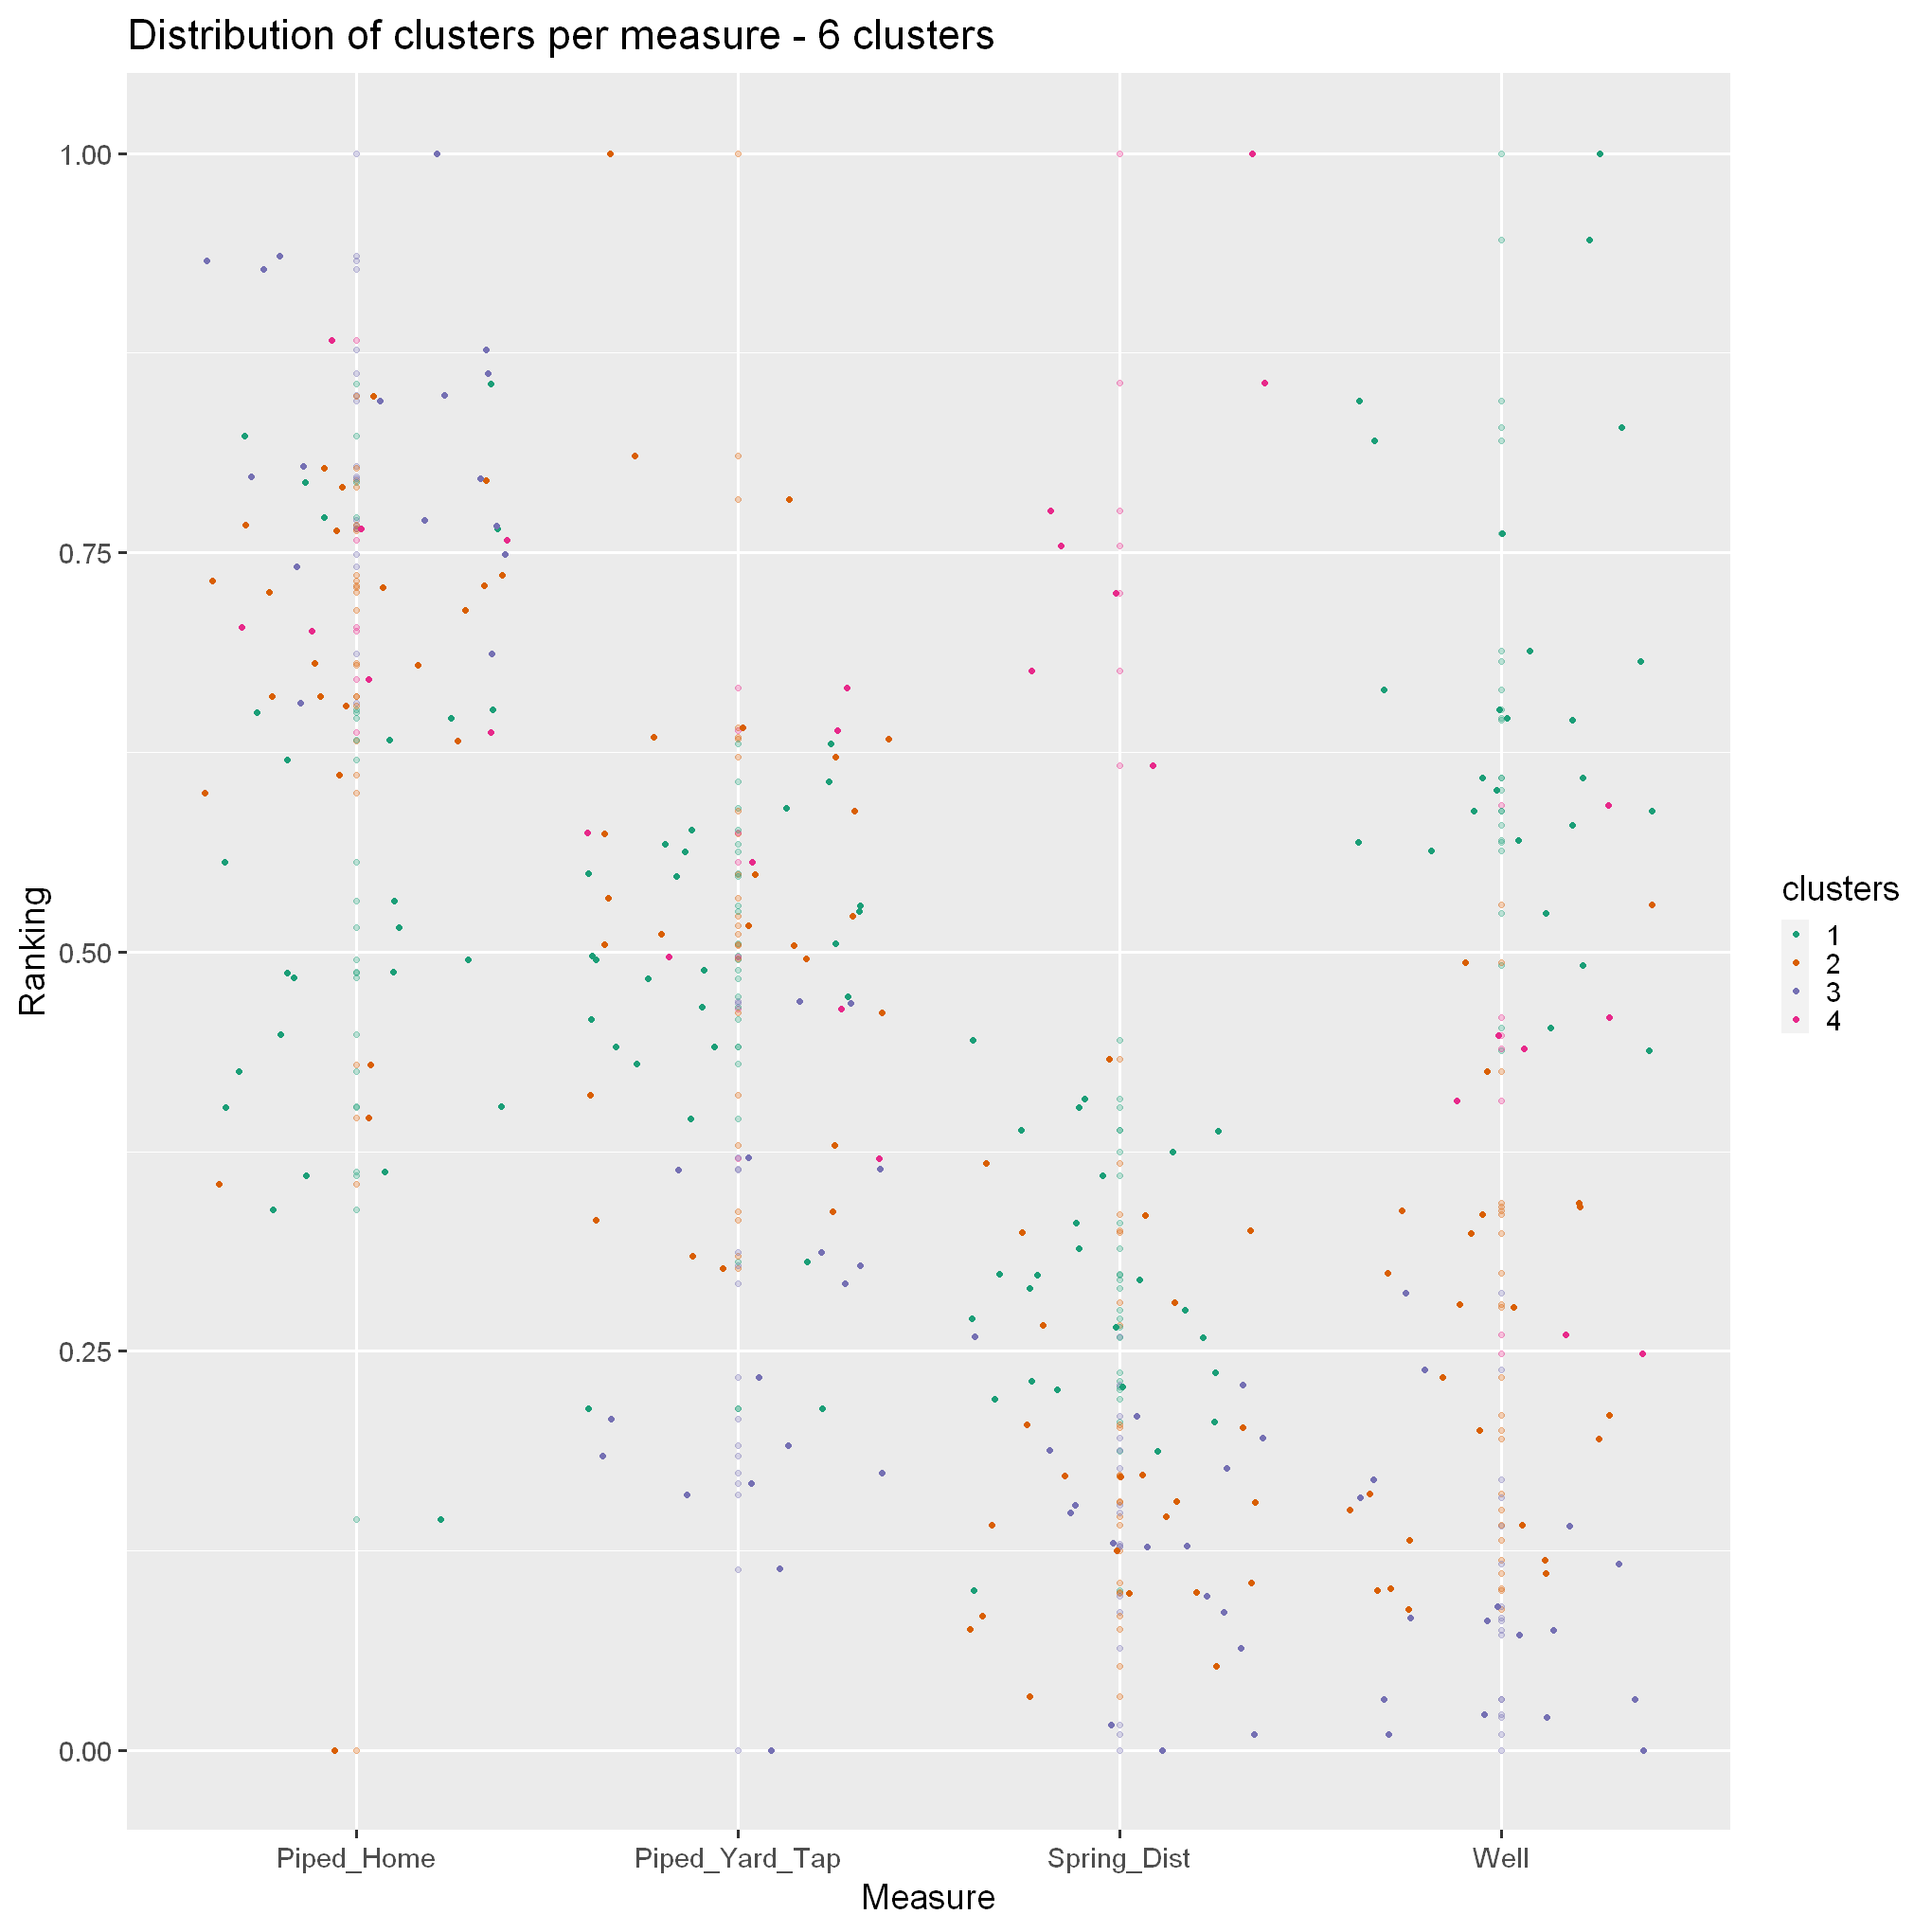

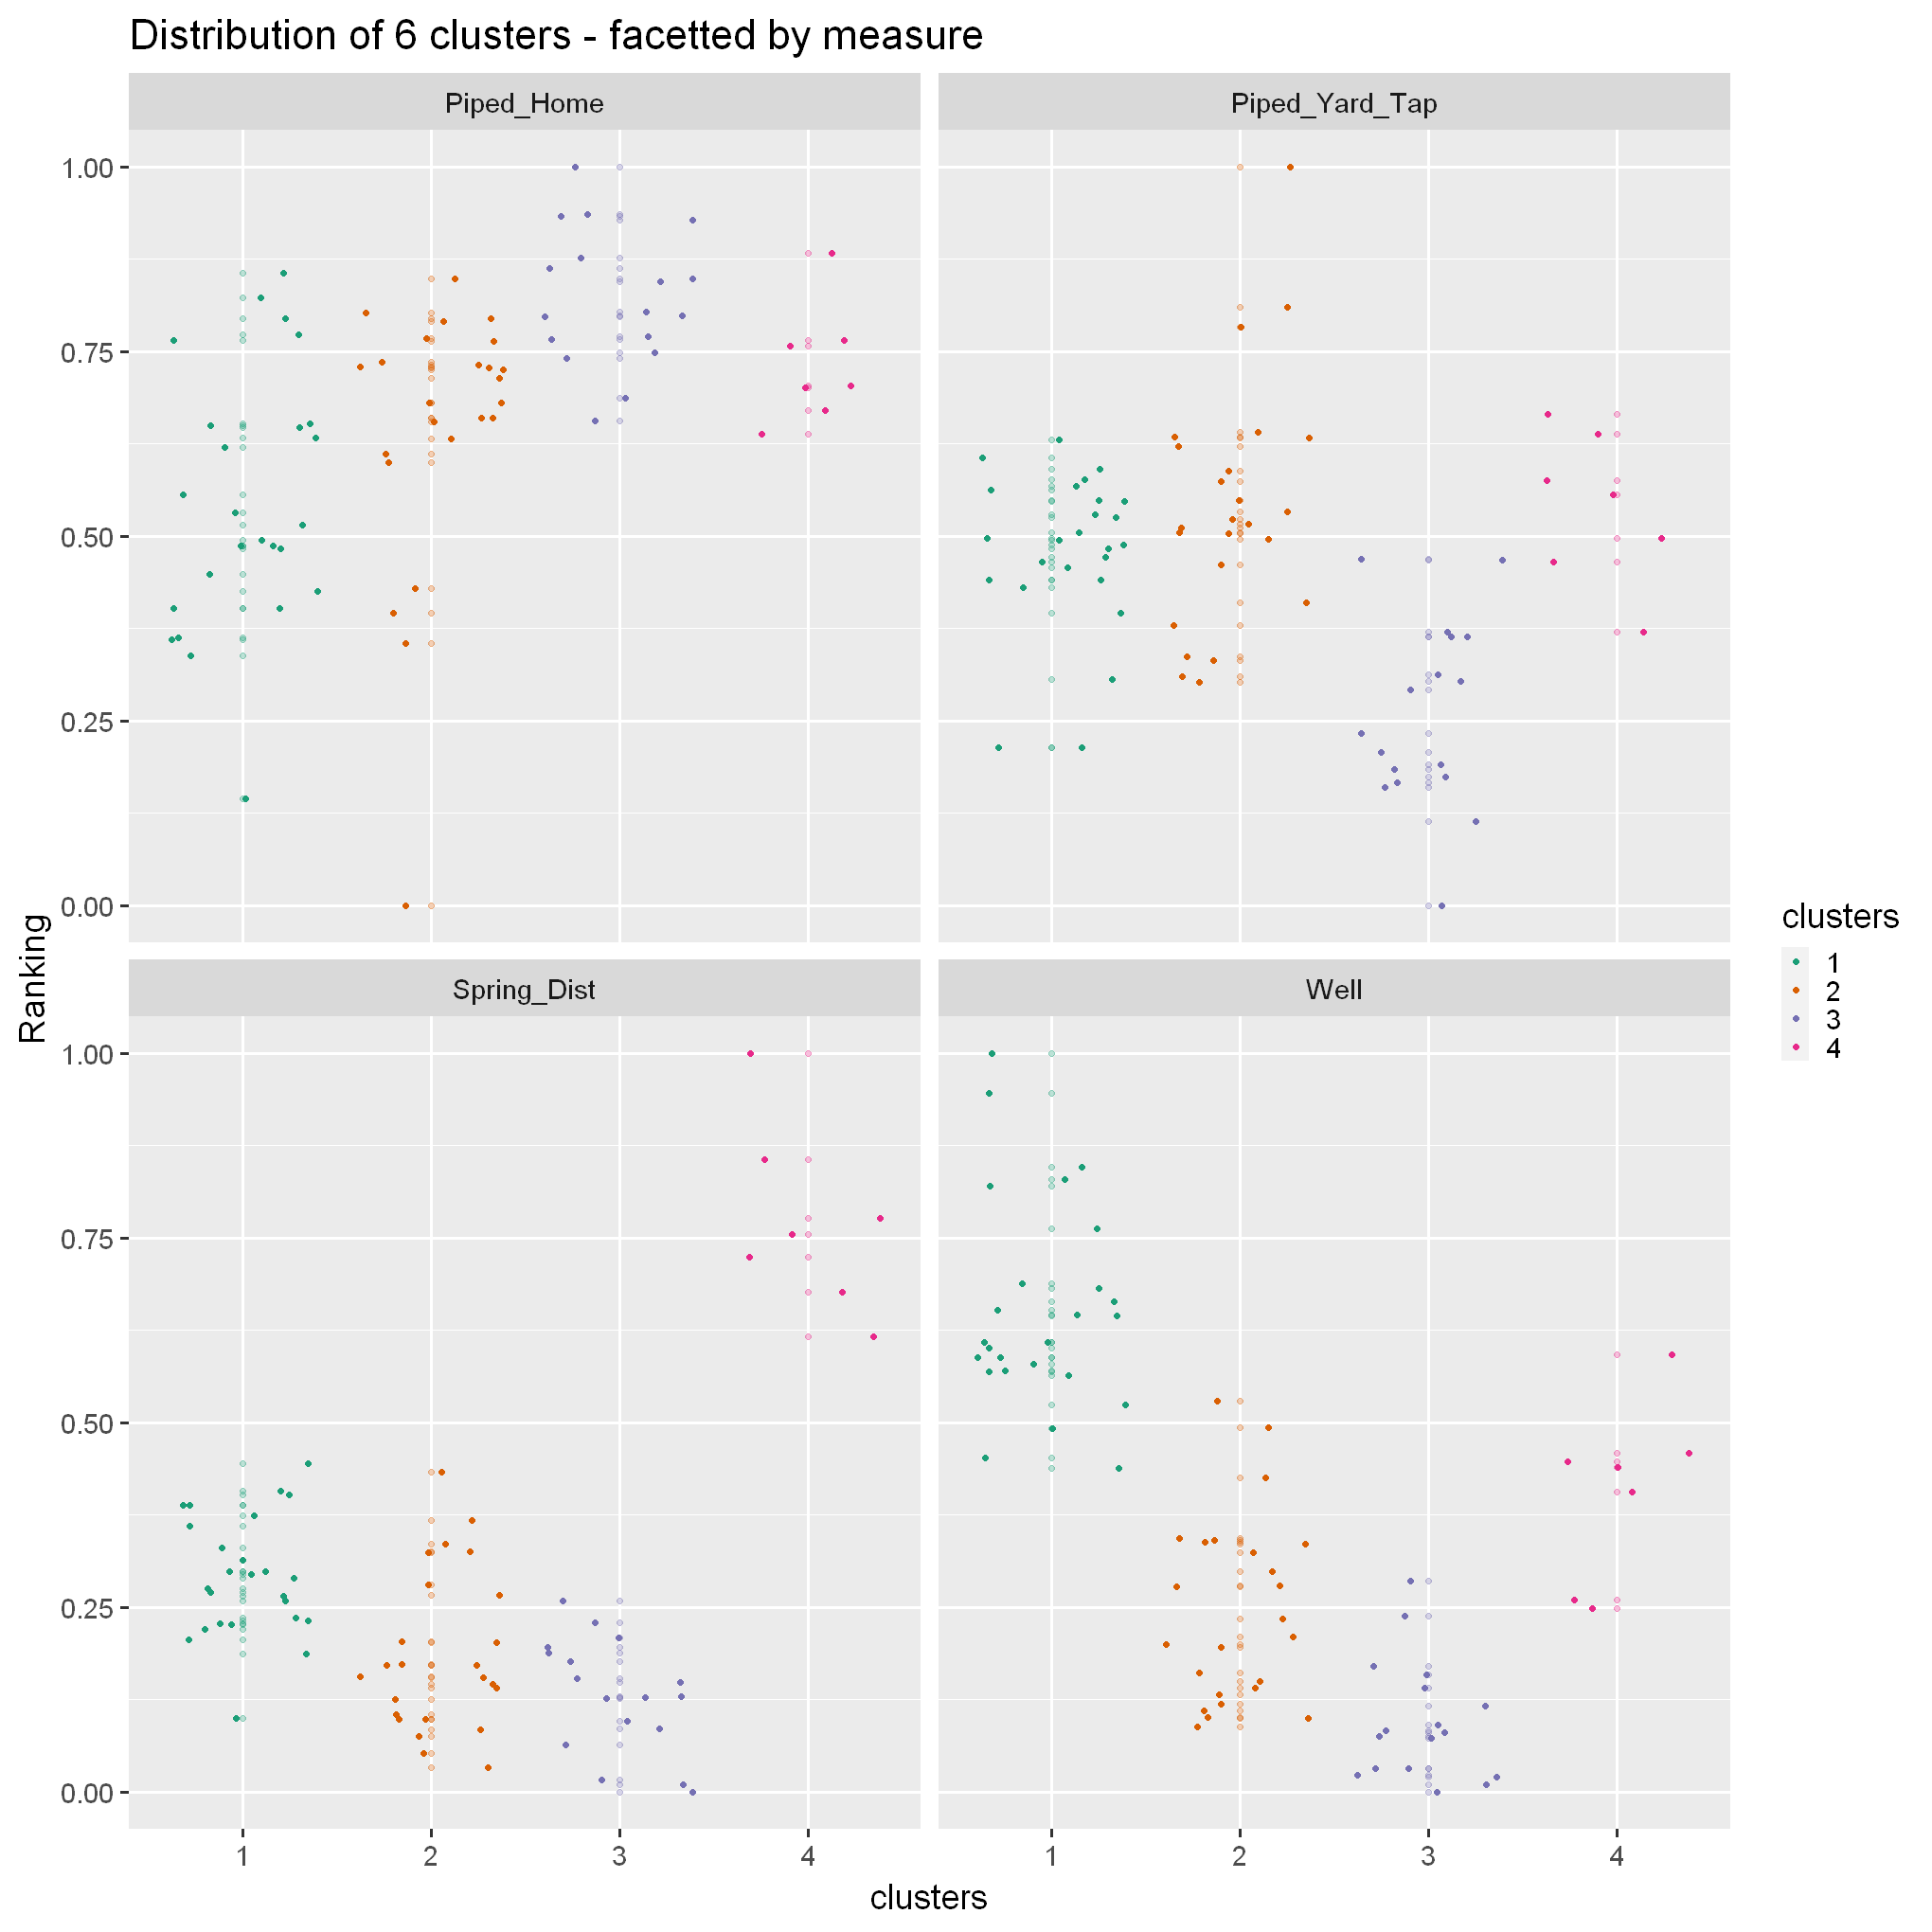

In [249]:
#data_wa$cluster <- cutree(hc.ward2,4) 
#head(df$clusters,7)
hc.ward2=hclust(dist(df), method ="ward.D2")
df$clusters <- cutree(hc.ward2,4)
df$clusters <- as.factor(df$clusters)

p <- ggplot(df, aes(clusters, Spring_Dist, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A","#66A61E" ,"#E6AB02") )
p <- p + theme_grey(base_size = 22) 
p

table(df$clusters)

#Group by the cluster assignment and calculate averages
df_clus_avg <- df %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df_clus_avg,7) 

sapply(df_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df_clus_avg, columns = c(2:5), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries_gathered <- df %>% gather(Measure, Ranking, Spring_Dist:Piped_Home) 

g <- ggplot(countries_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 6 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A","#66A61E" ,"#E6AB02")) 
g 
countries_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 6 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A","#66A61E" ,"#E6AB02"))
# set the set factor as for the clusters


# Ranking

In [253]:
df.wa <- read_excel("../../results/df-four-scores.xlsx",sheet=1)
df.wa <- df.wa %>% 
  rename(
     Spring_Dist = V1,
     Well = V2,
     Piped_Yard_Tap= V3,
     Piped_Home= V4   
    )

In [254]:
head(df.wa,7) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.33010263,0.60110288,0.4301594,0.6498170
Albania,0.20236862,0.27773577,0.3322685,0.5996713
Angola,0.37451327,0.65190041,0.4579437,0.7650363
Armenia,0.00000000,0.03179103,0.3635339,0.8450433
Azerbaijan,0.17116495,0.23385010,0.4104451,0.6323822
Bangladesh,0.05283778,0.10000389,0.3018868,0.0000000
Benin,0.22614760,0.60888154,0.4949832,0.5560220


In [256]:
df.wa["norm"] <- apply(df.wa[2:5], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [257]:
df.wa["distToCentroid"] = 0 # initialize

In [258]:
df.wa$clusters <- as.numeric(df$clusters)
head(df.wa)
#Turn into numeric to find centroids

Country,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.33010263,0.60110288,0.4301594,0.6498170,1.0380711,0,1
Albania,0.20236862,0.27773577,0.3322685,0.5996713,0.7668756,0,2
Angola,0.37451327,0.65190041,0.4579437,0.7650363,1.1662878,0,1
Armenia,0.00000000,0.03179103,0.3635339,0.8450433,0.9204704,0,3
Azerbaijan,0.17116495,0.23385010,0.4104451,0.6323822,0.8076854,0,2
Bangladesh,0.05283778,0.10000389,0.3018868,0.0000000,0.3223791,0,2


In [259]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa[,c(2:5)], list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,c(1:5)]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df.wa$clusters <- dfsimple$clusters                      
head(df.wa,7)
                       df <- df.wa

[1] 1.428932 2.191942 3.125739 4.193606

Country,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.33010263,0.60110288,0.4301594,0.6498170,1.0380711,0,1
Albania,0.20236862,0.27773577,0.3322685,0.5996713,0.7668756,0,2
Angola,0.37451327,0.65190041,0.4579437,0.7650363,1.1662878,0,1
Armenia,0.00000000,0.03179103,0.3635339,0.8450433,0.9204704,0,3
Azerbaijan,0.17116495,0.23385010,0.4104451,0.6323822,0.8076854,0,2
Bangladesh,0.05283778,0.10000389,0.3018868,0.0000000,0.3223791,0,2
Benin,0.22614760,0.60888154,0.4949832,0.5560220,0.9879516,0,1


In [260]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
#df[df$clusters == 5, "distToCentroid"] = abs(df[df$clusters == 5, "norm"] - centroiddf.wa[5])
#df[df$clusters == 6, "distToCentroid"] = abs(df[df$clusters == 6, "norm"] - centroiddf.wa[6])                       

head(df,7)
write_xlsx(df , '../../results/df-fa-cluster-rank.xlsx')

Country,Spring_Dist,Well,Piped_Yard_Tap,Piped_Home,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.33010263,0.60110288,0.4301594,0.6498170,1.0380711,0.3908607,1
Albania,0.20236862,0.27773577,0.3322685,0.5996713,0.7668756,1.4250665,2
Angola,0.37451327,0.65190041,0.4579437,0.7650363,1.1662878,0.2626440,1
Armenia,0.00000000,0.03179103,0.3635339,0.8450433,0.9204704,2.2052681,3
Azerbaijan,0.17116495,0.23385010,0.4104451,0.6323822,0.8076854,1.3842567,2
Bangladesh,0.05283778,0.10000389,0.3018868,0.0000000,0.3223791,1.8695631,2
Benin,0.22614760,0.60888154,0.4949832,0.5560220,0.9879516,0.4409803,1


In [262]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 7, 8)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.06792944,1
Eritrea,0.10630122,1
Mauritania,0.13580580,1
Tanzania,0.23654969,1
Chad,0.24869750,1
Moldova,0.25723627,1
Angola,0.26264401,1
Sierra Leone,0.27414008,1
Mozambique,0.32126220,1


In [264]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 7, 8)


In [266]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
#cluster.five <- subset(df1, clusters == 5 )
#cluster.six <- subset(df1, clusters == 6 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.06792944,1
Eritrea,0.10630122,1
Mauritania,0.13580580,1
Tanzania,0.23654969,1
Chad,0.24869750,1
Moldova,0.25723627,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.06792944,1
Eritrea,0.10630122,1
Mauritania,0.13580580,1
Tanzania,0.23654969,1
Chad,0.24869750,1
Moldova,0.25723627,1


   Country          distToCentroid       clusters
 Length:25          Min.   :0.06793   Min.   :1  
 Class :character   1st Qu.:0.26264   1st Qu.:1  
 Mode  :character   Median :0.41575   Median :1  
                    Mean   :0.38881   Mean   :1  
                    3rd Qu.:0.49845   3rd Qu.:1  
                    Max.   :0.74964   Max.   :1  

In [265]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)
#cluster.five %>% 
#  arrange_at("Country", desc) %>%
 #  arrange_at("distToCentroid") %>%
 #  arrange_at("clusters") %>%
# select(1:3)
#cluster.six %>% 
  #arrange_at("Country", desc) %>%
  # arrange_at("distToCentroid") %>%
  # arrange_at("clusters") %>%
# select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.1172629,1
Mauritania,0.2046368,1
Eritrea,0.2163781,1
Tanzania,0.2229692,1
Madagascar,0.2238092,1
Sierra Leone,0.2709652,1
Angola,0.2719511,1
Chad,0.2751895,1
Mozambique,0.2840962,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Morocco,1.113447,2
Peru,1.125854,2
Ukraine,1.176895,2
Egypt,1.197240,2
Armenia,1.204606,2
Colombia,1.222540,2
Albania,1.289853,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Sao Tome and Principe,1.689346,3
Lesotho,1.756311,3
Vietnam,1.756910,3
Ghana,1.793802,3
Gambia,1.825952,3
Congo,1.861362,3
Cote d'Ivoire,1.906940,3
Turkmenistan,1.913181,3
Yemen,1.913565,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Burkina Faso,2.824990,4
Uganda,2.878662,4
Liberia,2.879670,4
Cameroon,2.880235,4
Zimbabwe,2.913056,4
Myanmar,2.940080,4
Malawi,2.940120,4
Guinea,2.951972,4
Nepal,3.022975,4


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Haiti,3.550306,5
Burundi,3.573753,5
Congo Democratic Republic,3.577332,5
Rwanda,3.626293,5
Ethiopia,3.765726,5
Papua New Guinea,3.775585,5


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Guatemala,4.865606,6
Dominican Republic,4.879109,6
Guyana,4.948319,6
Indonesia,4.949745,6
Maldives,4.985310,6
Philippines,5.040846,6
Honduras,5.064560,6
Turkey,5.084408,6
Jordan,5.126758,6


# World Map

In [221]:
df = read_excel('../../results/df-fa-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,ptap.pipy.tles,well,sprg.tmor,tles.ctan.surw,othw.truc,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.4772910,0.6477678,0.3468084,0.84090813,0.7141206,1.4088224,0.3438505,1
Albania,0.4099690,0.3283735,0.3086172,0.23798068,0.7155084,0.9693995,1.2898526,2
Angola,0.5194338,0.6641239,0.3615613,0.76592350,0.8742424,1.4807218,0.2719511,1
Armenia,0.4569304,0.2107767,0.2364113,0.01842226,0.8960111,1.0546458,1.2046063,2
Azerbaijan,0.5293132,0.2558237,0.2584627,0.44183676,0.7282314,1.0667530,2.2116967,3
Bangladesh,0.3789622,0.1779115,0.1731506,0.74383623,0.0000000,0.8709410,3.2840429,4


In [222]:
df = df[, c(1,9)] # select only country name and cluster number
head(df,7)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,4
Benin,1


In [223]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 73  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,4


In [224]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [225]:
setdiff(df$region,coords$name)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

In [226]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [227]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [228]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [229]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

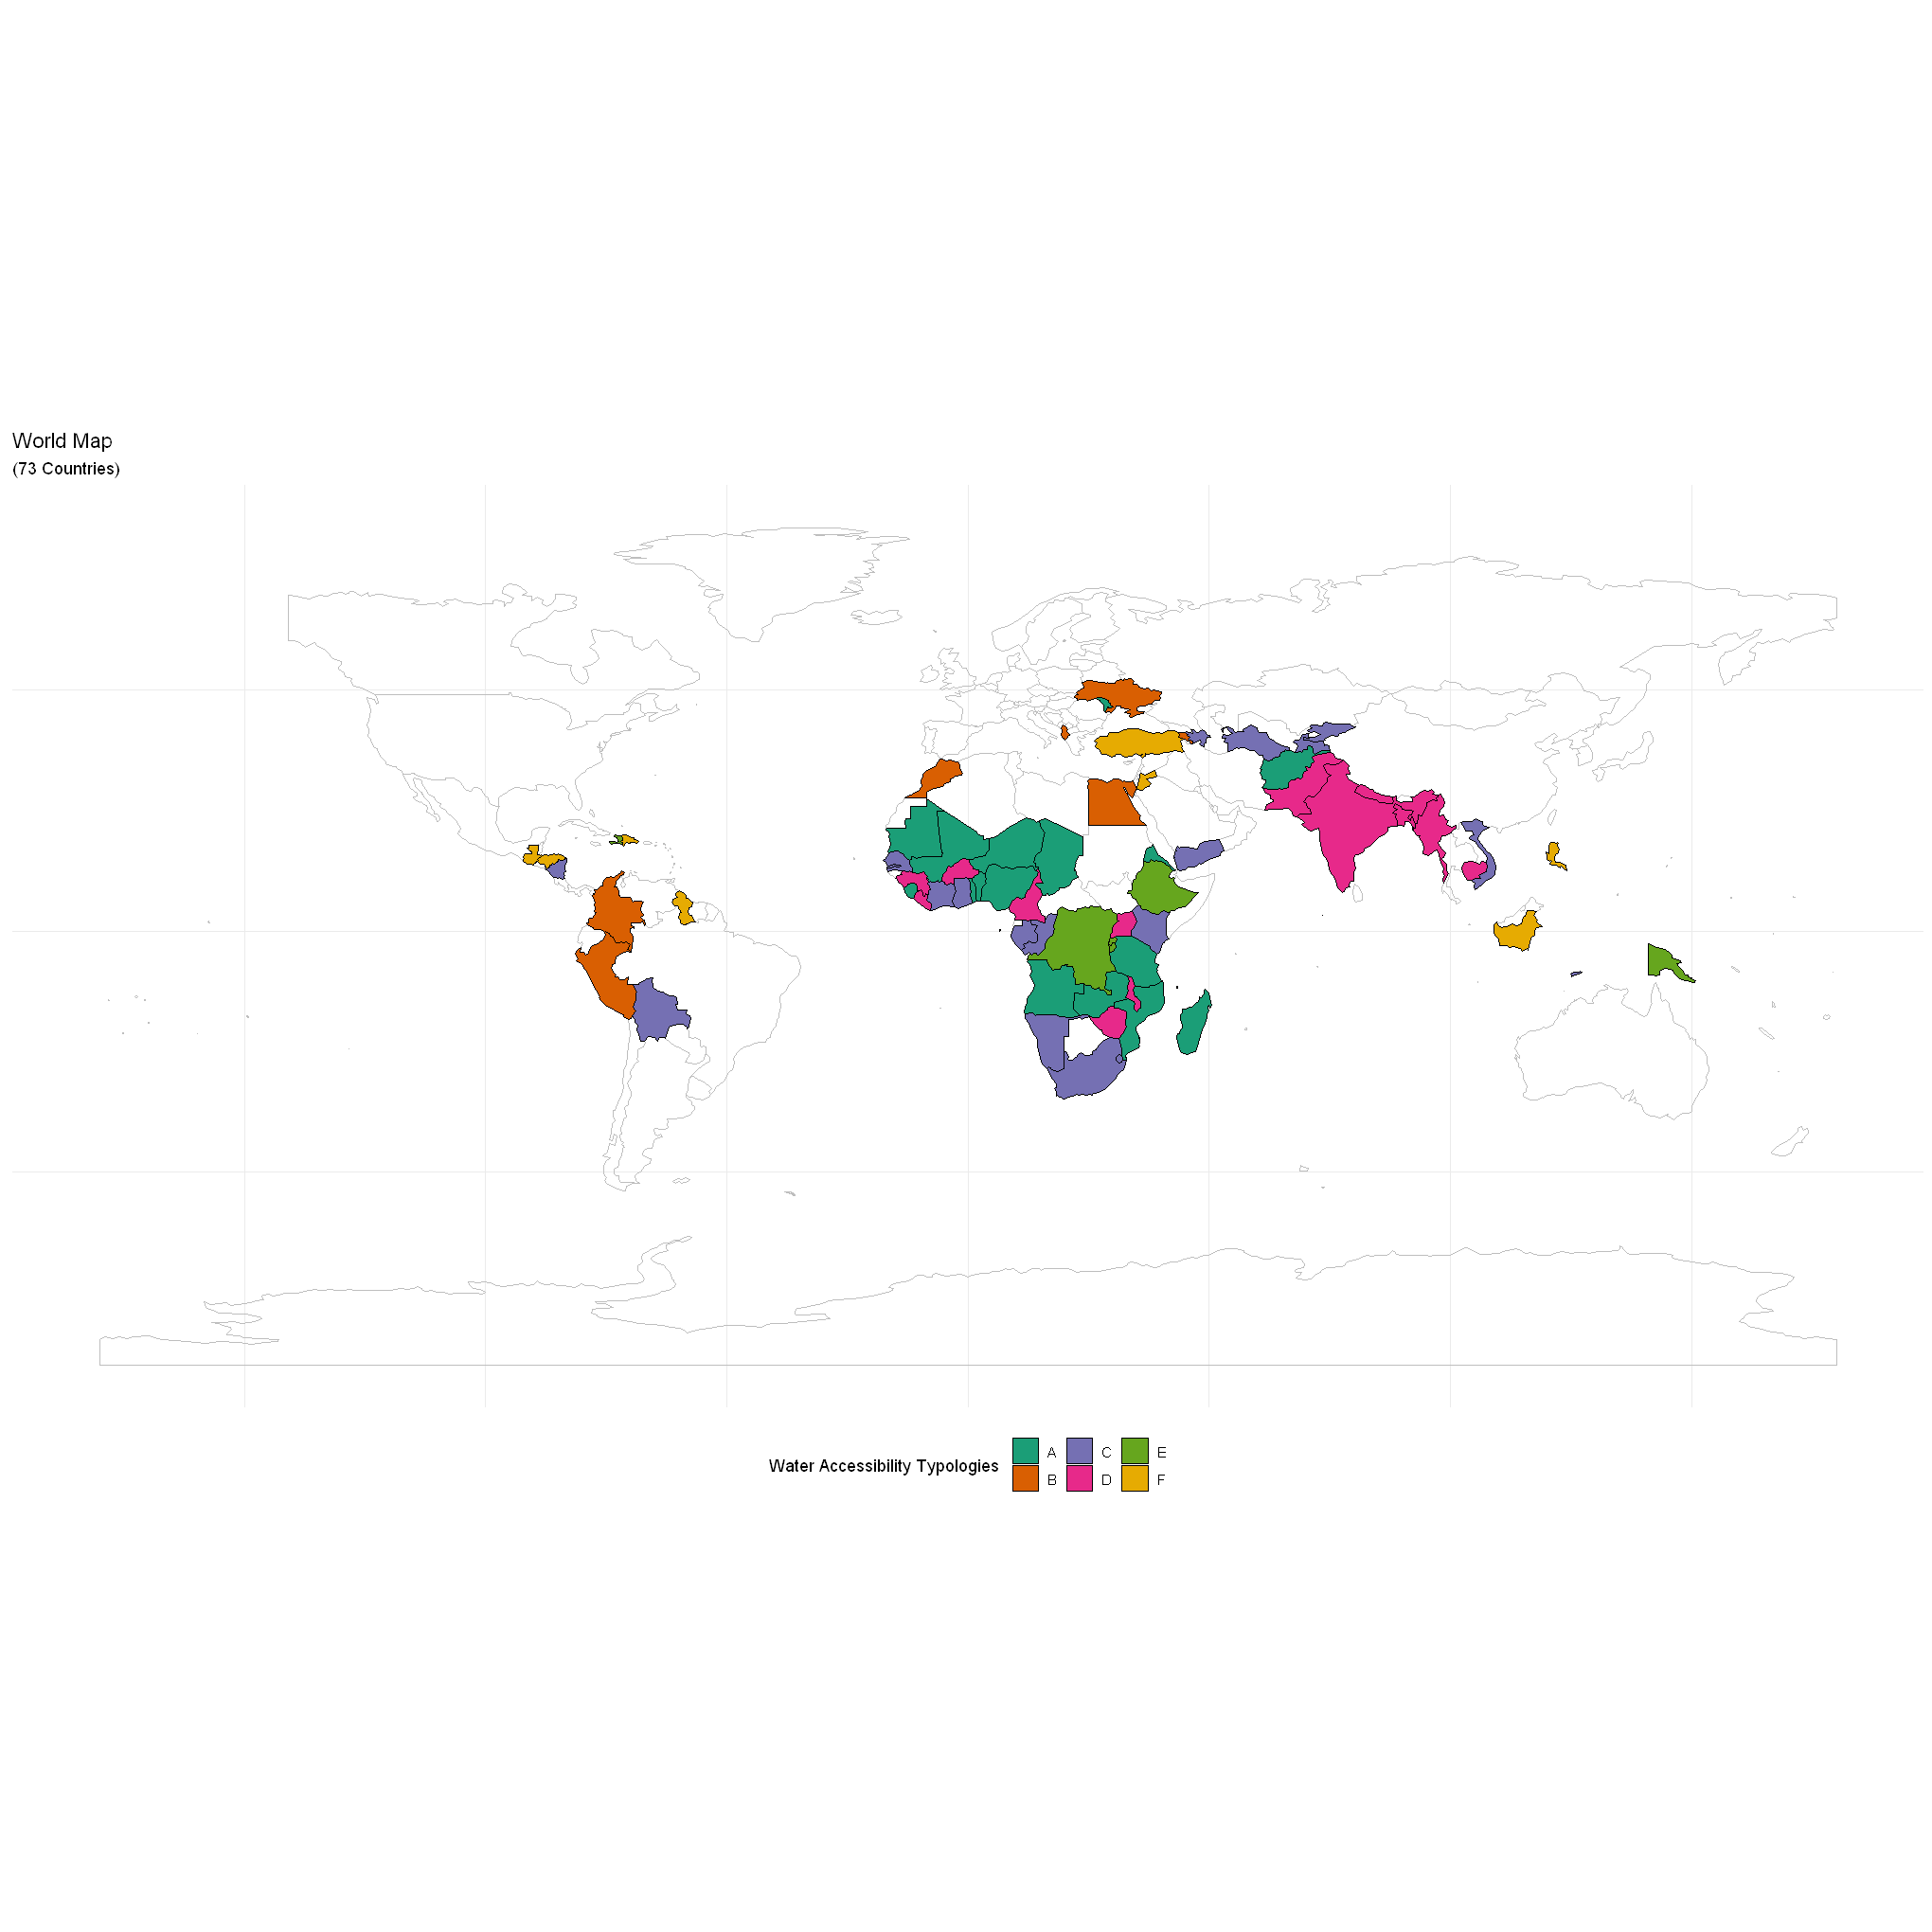

In [230]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C","D","E","F")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))
